## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_counter = len(mouse_study["Mouse ID"].unique())
mice_counter

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_study.groupby(["Mouse ID", "Timepoint"]).agg({"Mouse ID": "count"}).sort_values("Timepoint", ascending=False)
duplicate_mice

,,Mouse ID
Mouse ID,Timepoint,
l897,45,1
j913,45,1
g791,45,1
h246,45,1
i177,45,1
...,...,...
t994,0,1
g867,0,1
t724,0,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_study.copy()
clean_df = clean_df.drop(clean_df[clean_df["Mouse ID"] == "g989"].index)
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice in the clean DataFrame.
mice_counter = len(clean_df["Mouse ID"].unique())
mice_counter

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_df = pd.DataFrame ({
    "Mean": [clean_df["Tumor Volume (mm3)"].mean()],
    "Median": [clean_df["Tumor Volume (mm3)"].median()],
    "Variance": [clean_df["Tumor Volume (mm3)"].var()],
    "Standard Deviation": [clean_df["Tumor Volume (mm3)"].std()],
    "SEM": [clean_df["Tumor Volume (mm3)"].sem()]   
})
tumor_df

,Mean,Median,Variance,Standard Deviation,SEM
0,50.435293,48.933454,79.462907,8.914197,0.205591


In [7]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_df = pd.DataFrame ({
    "Mean": clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean(),
    "Median": clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median(),
    "Variance": clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var(),
    "Standard Deviation": clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std(),
    "SEM": clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
})
drug_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
agg_df = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']})
agg_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

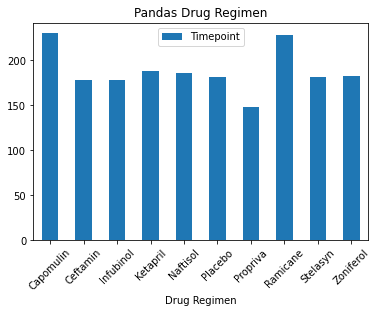

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
total_timepoint = clean_df.groupby("Drug Regimen").agg({"Timepoint": "count"})
total_timepoint.plot(kind="bar", rot=45)
plt.title("Pandas Drug Regimen")
plt.show()

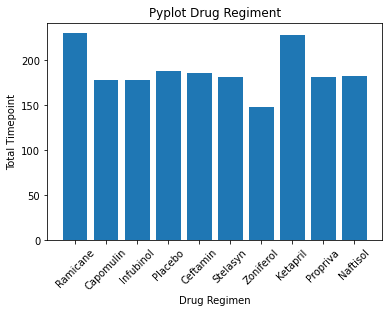

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = clean_df["Drug Regimen"].unique()
plt.bar(x_axis, total_timepoint["Timepoint"])
plt.xlabel("Drug Regimen")
plt.xticks(rotation=45)
plt.ylabel("Total Timepoint")
plt.title("Pyplot Drug Regiment")
plt.show()

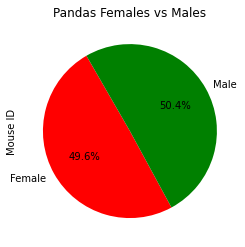

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
colors = ["red", "green"]
sex_pandas = clean_df.groupby("Sex").nunique()["Mouse ID"]
sex_pandas.plot(kind="pie", colors=colors, autopct='%1.1f%%', startangle=120)
plt.title("Pandas Females vs Males")
plt.show()

Text(0.5, 1.0, 'Pyplot Females vs Males')

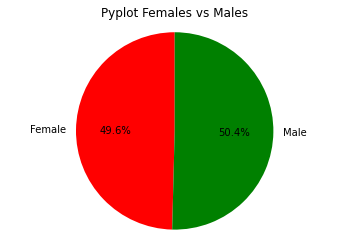

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["red", "green"]
labels = ["Female", "Male"]
fig1, ax1 = plt.subplots()
ax1.pie(sex_pandas, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.title("Pyplot Females vs Males")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse in Capomulin
Capomulin = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"].groupby("Mouse ID").agg({"Tumor Volume (mm3)": "last"})

In [14]:
# Calculate the final tumor volume of each mouse in Ramicane
Ramaicane = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane"].groupby("Mouse ID").agg({"Tumor Volume (mm3)": "last"})

In [15]:
# Calculate the final tumor volume of each mouse in Infubinol
Infubinol = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol"].groupby("Mouse ID").agg({"Tumor Volume (mm3)": "last"})

In [16]:
# Calculate the final tumor volume of each mouse in Ceftamin
Ceftamin = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin"].groupby("Mouse ID").agg({"Tumor Volume (mm3)": "last"})

In [17]:
# Create a loop for all 4 regimens
# Calculate the IQR and quantitatively determine if there are any potential outliers
# Determine outliers using upper and lower bounds 
regimen_loop = [Capomulin, Ramaicane, Infubinol, Ceftamin]
for x in regimen_loop:
    quartiles = x["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    interq = upperq-lowerq
    
    print(f"The lower quartile is: {lowerq}")
    print(f"The upper quartile is: {upperq}")
    print(f"The inter quartile is: {interq}")
    print(f"The median temperatre is: {round(quartiles[0.5], 2)}")
    
    lower_bound = round(lowerq - (1.5*interq),2)
    upper_bound = round(upperq + (1.5*interq),2)
   
    print(f"The values below {lower_bound} could be outliers")
    print(f"The values above {upper_bound} could be outliers")

The lower quartile is: 32.37735684
The upper quartile is: 40.1592203
The inter quartile is: 7.781863460000004
The median temperatre is: 38.13
The values below 20.7 could be outliers
The values above 51.83 could be outliers
The lower quartile is: 31.56046955
The upper quartile is: 40.65900627
The inter quartile is: 9.098536719999998
The median temperatre is: 36.56
The values below 17.91 could be outliers
The values above 54.31 could be outliers
The lower quartile is: 54.04860769
The upper quartile is: 65.52574285
The inter quartile is: 11.477135160000003
The median temperatre is: 60.17
The values below 36.83 could be outliers
The values above 82.74 could be outliers
The lower quartile is: 48.72207785
The upper quartile is: 64.29983003
The inter quartile is: 15.577752179999997
The median temperatre is: 59.85
The values below 25.36 could be outliers
The values above 87.67 could be outliers


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
